In [1]:
import pandas as pd

df = pd.read_csv("datasets/2015.csv", sep=",")
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [2]:
data = df.loc[:, ["Happiness Score", "Family", "Generosity"]]
data.rename(columns={"Happiness Score": "Score"}, inplace=True)
data.head(3)

,Score,Family,Generosity
0,7.587,1.34951,0.29678
1,7.561,1.40223,0.43630
2,7.527,1.36058,0.34139


이상치 확인

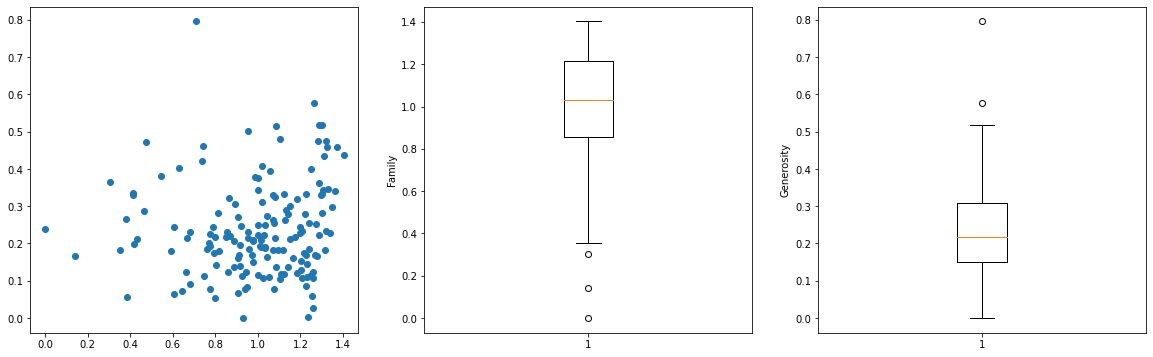

In [3]:
import matplotlib.pyplot as plt

family = data["Family"]
generosity = data["Generosity"]

plt.figure(figsize=(20, 6))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

ax1.scatter(family, generosity)
ax2.boxplot(family)
ax2.set_ylabel("Family")
ax3.boxplot(generosity)
ax3.set_ylabel("Generosity")

plt.show()

IQR을 활용한 이상치 제거

In [4]:
def drop_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    mask = (df[column] < q1 - 1.5 * iqr) | (q3 + 1.5 * iqr < df[column])
    outliers = df[mask]
    df.drop(outliers.index, inplace=True)

drop_outliers(data, "Family")
drop_outliers(data, "Generosity")

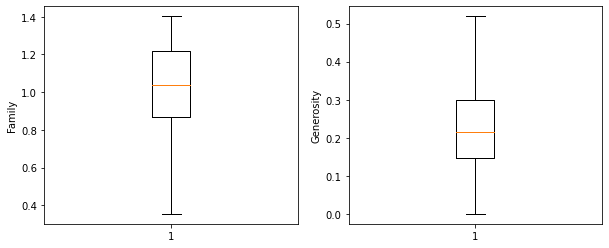

In [5]:
plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.boxplot(data["Family"])
ax1.set_ylabel("Family")
ax2.boxplot(data["Generosity"])
ax2.set_ylabel("Generosity")

plt.show()

MinMax Scaler를 활용한 표준화

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

family = data["Family"].values.tolist()
generosity = data["Generosity"].values.tolist()
family = np.array(family).reshape(-1, 1)
generosity = np.array(generosity).reshape(-1, 1)
data_arr = np.concatenate((family, generosity), axis=1)

scaler = MinMaxScaler()
scaled_arr = scaler.fit_transform(data_arr)

print(f"scaled array >> min: {np.min(scaled_arr)}, max: {np.max(scaled_arr)}, shape: {scaled_arr.shape}")

scaled array >> min: 0.0, max: 1.0, shape: (153, 2)


k값에 따른 k-means 성능 확인

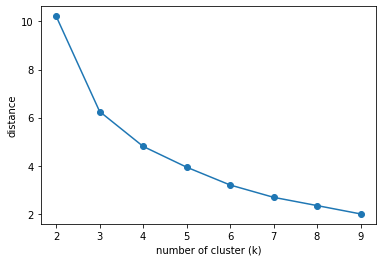

In [7]:
from sklearn.cluster import KMeans

inertia = []
k_range = np.arange(2, 10)
for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(scaled_arr)
    inertia.append(model.inertia_)

plt.scatter(k_range, inertia)
plt.plot(k_range, inertia)
plt.xlabel("number of cluster (k)")
plt.ylabel("distance")
plt.show()

k-means를 통한 군집화

In [8]:
K = 4

model = KMeans(n_clusters=K)
model.fit(scaled_arr)
data["cluster"] = model.fit_predict(scaled_arr)

print(f"K: {K}, inertia: {model.inertia_}")

K: 4, inertia: 4.797198404542834


군집의 시각화 및 분포 확인

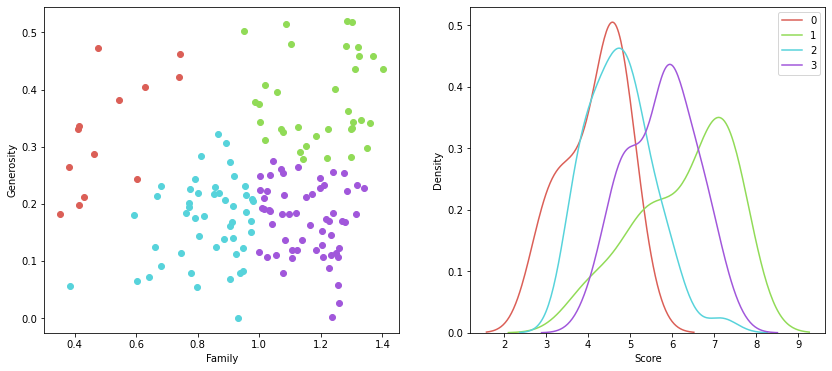

In [9]:
import seaborn as sns

labels = np.unique(model.labels_)
labels.sort()
colors = sns.color_palette("hls", len(labels))

plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

for label, color in zip(labels, colors):
    labeled = data[data["cluster"] == label]
    ax1.scatter(labeled["Family"], labeled["Generosity"], color=color)
    sns.kdeplot(labeled["Score"], color=color, label=label, ax=ax2)
ax1.set_xlabel("Family")
ax1.set_ylabel("Generosity")
ax2.set_xlabel("Score")
ax2.legend()

plt.show()